In [1]:
import numpy as np
import pandas as pd
import os
from matplotlib import pyplot as plt
import re

In [2]:
domain_list = ['photo', 'art_painting', 'cartoon', 'sketch']
metric = "AUPRC"

# dir_path = "../results/DGAD/method5/1"
dir_path = '../results/devnet/many_versus_many'
dir_path = '../results/DGAD/method5/3'
dir_path = "../results/DGAD/method6_tau"
# dir_path = '../results/DGAD/method5/3'
# dir_path = '../results/DGAD/method5_reg_lambda'
# dir_path = '../results/DGAD/method8'
dir_path = '../results/DGAD/method6_lambda'
# dir_path = '../results/devnet/many_versus_many'
# dir_path = '../results/DGAD/method7'
# dir_path = '../results/DGAD/method7_tau_lambda'

dir_path = '../results/DGAD/method6_revision'
dir_path = '../results/DGAD/method5/3'
dir_path = '../results/DGAD/method5_aug/3'
dir_path = '../results/DGAD/method5_reg_lambda'
dir_path = '../results/DGAD/method10'
dir_path = '../results/DGAD/method9_beta_list'
dir_path = '../results/DGAD/method10_prototype_norm'
dir_path = '../results/DGAD/method9'
dir_path = '../results/DGAD/method9_revision'
dir_path = '../results/DGAD/method9_kmeans'
dir_path = '../results/devnet/one_source_domain'
dir_path = '../results/devnet/many_versus_many'
# dir_path = '../results/DGAD/method6_lambda'
dir_path = '../results/DGAD/method6_revision'
# dir_path = '../results/DGAD/VAE_DEVNET'
# dir_path = '../results/DGAD/method6_2devnet'
# dir_path = '../results/devnet/many_versus_many'
dir_path = '../results/devnet/3domain'
dir_path = '../results/DGAD/method12'
dir_path = '../results/DGAD/method13'
dir_path = '../results/DGAD/method14'
# dir_path = '../old_results/DGAD/method6_lambda'
# dir_path = '../results/DGAD/method13_lambda'
dir_path = '../results/DGAD/VAE_LPIPS'
dir_path = '../results/DGAD/VAE_LPIPS_DEVNET'
dir_path = '../results/DGAD/method13'
dir_path = '../results/DGAD/VAE_LPIPS_DEVNET_rec_lambda'
dir_path = '../results/DGAD/VAE_LPIPS_DEVNET_rec_lambda_no_balance_sample'
# dir_path = '../results/DGAD/VAE_LPIPS_DEVNET_rec_lambda'
dir_path = '../results/DGAD/V_L_D'
dir_path = '../results/DGAD/20240908V_L_D'

dir_path = '../results/devnet/3domain'
# dir_path = '../old_results/devnet/many_versus_many'
# dir_path = '../results/devnet/20240915'
dir_path = '../results/DGAD/latent_dim_DGAD'

dir_path = '../results/DGAD/latent_dim_devnet'

# dir_path = '../results/DGAD/latent_dim_DGAD_lambda'


dir_path = '../results/devnet/20240915'

# dir_path = '../results/DGAD/method13_lambda'

dir_path = '../results/DGAD/latent_dim_CVAE_Unet'
dir_path = '../results/DGAD/latent_dim_CVAE_Unet'

dir_path = '../results/DGAD/VAE_LPIPS_DEVNET_rec_lambda_no_balance_sample'

# dir_path = '../results/DGAD/20240908V_L_D'
dir_path = '../results/DGAD/CVAE_DEVNET_rec_N'

dir_path = '../results/DGAD/method16'
# dir_path = '../results/devnet/20240915'
# dir_path = '../results/DGAD/method16_lambda'
dir_path = '../results/DGAD/method16_contamination'
# dir_path = '../results/devnet/PACS_contamination'

# dir_path = '../results/DGAD/method16_contamination_lambda'

In [3]:
import itertools
# normal_class=["0", "1", "2", "3", "4", "5", "6"]
# normal_class=["0 1 2 3", "4 5 6", "0 2 4 6", "1 3 5", "0", "1", "2", "3", "4", "5", "6"]
# anomaly_class=["4 5 6", "0 1 2 3", "1 3 5", "0 2 4 6", "1 2 3 4 5 6", "0 2 3 4 5 6", "0 1 3 4 5 6", "0 1 2 4 5 6", "0 1 2 3 5 6", "0 1 2 3 4 6", "0 1 2 3 4 5"]
# epochs_list=[5, 10, 15, 20, 30]
# lr_list=[0.01, 0.001, 0.0005, 0.0002, 0.00005, 0.00001]
reg_lambda=[1,2,5,10]
NCE_lambda=[1,2,5,10]
PL_lambda=[1,2,5,10]
# cnt=[0,1,2,3,4]
cnt=[0]
all_para_list = list(itertools.product(reg_lambda, NCE_lambda, PL_lambda, cnt))
print(len(all_para_list))
all_para_list[0]

64


(1, 1, 1, 0)

In [4]:
ans = []
# para_name_list=["normal_class", "anomaly_class", "pre_lr", "pre_epochs", "lr", "epochs", "cnt"]
# para_name_list=["normal_class", "anomaly_class", "lr", "epochs", "cnt", "tau1", "tau2"]
para_name_list=["normal_class", "anomaly_class", "lr", "epochs", "cnt",]
# para_name_list=["normal_class", "anomaly_class", "lr", "epochs", "cnt", "reg_lambda", "BalancedBatchSampler"]
if dir_path.__contains__("lambda"):
    para_name_list += ["reg_lambda", "NCE_lambda", "PL_lambda", "class_lambda"]
if dir_path.__contains__("contamination"):
    para_name_list += ["contamination_rate"]
# para_name_list=["normal_class", "anomaly_class", "lr", "epochs", "cnt", "rec_lambda",]
# para_name_list=["normal_class", "anomaly_class", "lr", "epochs", "cnt","reg_lambda"]
# para_name_list=["normal_class", "anomaly_class", "lr", "epochs", "cnt", "tau1", "tau2", "reg_lambda", "NCE_lambda", "PL_lambda"]
# para_name_list=["normal_class", "anomaly_class", "lr", "epochs", "cnt", "origin_svdd_lambda", "class_svdd_lambda", "align_lambda", "beta"]
print(len(os.listdir(dir_path)))
for file_name in os.listdir(dir_path):
    record = []
    data = np.load(f'{dir_path}/{file_name}', allow_pickle=True)
    max_epoch = data["val_max_metric"].item()["epoch"]
    # max_epoch = [i for i, val in enumerate(data[f"val_{metric}_list"]) if (val == max(data[f"val_{metric}_list"]))][-1]
    
    for key in para_name_list:
        if key in data["args"].item():
            record.append(data["args"].item()[key])
        else:
            record.append(None)
    
    record.append(max_epoch)

    if "metric" in data["val_max_metric"].item():
        for key in domain_list:
            record.append(0)
        for key in domain_list:
            record.append(0)
        for key in domain_list:
            record.append(data["val_max_metric"].item()["metric"][key]["AUROC"])
        for key in domain_list:
            record.append(data["val_max_metric"].item()["metric"][key]["AUPRC"])
    else:
        for key in domain_list:
            record.append(data["test_metric"].item()[key]["AUROC"])
        for key in domain_list:
            record.append(data["test_metric"].item()[key]["AUPRC"])
        for key in domain_list:
            record.append(data["test_results_list"][max_epoch][key]["AUROC"])
        for key in domain_list:
            record.append(data["test_results_list"][max_epoch][key]["AUPRC"])

    record.append(file_name)
    ans.append(record)

ans = pd.DataFrame(ans,columns=para_name_list + ["max_val_epoch"] +\
             [f'{item}_AUROC' for item in domain_list] + \
                [f'{item}_AUPRC' for item in domain_list] +\
                    [f'val_{item}_AUROC' for item in domain_list] +\
                        [f'val_{item}_AUPRC' for item in domain_list] + ["file_name"])

ans["normal_class"] = ans["normal_class"].astype(str)
ans["anomaly_class"] = ans["anomaly_class"].astype(str)
ans["AUROC_mean"] = ans[["art_painting_AUROC","cartoon_AUROC","photo_AUROC","sketch_AUROC"]].mean(axis = 1)
ans["AUPRC_mean"] = ans[["art_painting_AUPRC","cartoon_AUPRC","photo_AUPRC","sketch_AUPRC"]].mean(axis = 1)
ans["val_AUROC_mean"] = ans[["val_art_painting_AUROC","val_cartoon_AUROC","val_photo_AUROC","val_sketch_AUROC"]].mean(axis = 1)
ans["val_AUPRC_mean"] = ans[["val_art_painting_AUPRC","val_cartoon_AUPRC","val_photo_AUPRC","val_sketch_AUPRC"]].mean(axis = 1)
ans["normal_class"] = ans["normal_class"].apply(lambda x :re.sub("\[|\]|,", "", x))
ans["anomaly_class"] = ans["anomaly_class"].apply(lambda x :re.sub("\[|\]|,", "", x))
ans.head(5)

400


,normal_class,anomaly_class,lr,epochs,cnt,contamination_rate,max_val_epoch,photo_AUROC,art_painting_AUROC,cartoon_AUROC,...,val_sketch_AUROC,val_photo_AUPRC,val_art_painting_AUPRC,val_cartoon_AUPRC,val_sketch_AUPRC,file_name,AUROC_mean,AUPRC_mean,val_AUROC_mean,val_AUPRC_mean
0,0,1 2 3 4 5 6,0.00010,40,1,0.02,0,0,0,0,...,0.866883,0.930556,0.471811,0.550397,0.501984,"method=16,backbone=DGAD15,domain_cnt=3,normal_...",0.0,0.0,0.883054,0.613687
1,0,1 2 3 4 5 6,0.00010,40,5,0.02,0,0,0,0,...,0.880952,0.897222,0.552490,0.747182,0.251617,"method=16,backbone=DGAD15,domain_cnt=3,normal_...",0.0,0.0,0.913288,0.612128
2,0,1 2 3 4 5 6,0.00010,40,1,0.04,0,0,0,0,...,0.916667,0.873413,0.425773,0.610690,0.449946,"method=16,backbone=DGAD15,domain_cnt=3,normal_...",0.0,0.0,0.895997,0.589956
3,0,1 2 3 4 5 6,0.00001,30,1,0.12,4,0,0,0,...,0.899351,0.835714,0.409415,0.555250,0.372584,"method=16,backbone=DGAD15,domain_cnt=3,normal_...",0.0,0.0,0.887958,0.543241
4,0,1 2 3 4 5 6,0.00001,30,0,0.02,6,0,0,0,...,0.870130,0.744048,0.500349,0.653822,0.481517,"method=16,backbone=DGAD15,domain_cnt=3,normal_...",0.0,0.0,0.887231,0.594934


In [5]:
# ans = ans[ans["epochs"] != 2]
# if dir_path.__contains__("devnet"):
#     ans = ans[ans["lr"] != 0.00005]
# ans = ans[ans["cnt"] == 10]
# ans = ans[ans["BalancedBatchSampler"]==0]

In [6]:
ans["normal_class"].value_counts()

0    400
Name: normal_class, dtype: int64

In [7]:
ans["contamination_rate"].value_counts()

0.02    96
0.04    64
0.12    60
0.10    60
0.06    60
0.08    60
Name: contamination_rate, dtype: int64

In [8]:
ans.cnt.value_counts()

0    88
1    84
3    72
2    72
4    72
5    12
Name: cnt, dtype: int64

In [9]:
# pre_epochs_list = [10, 30, 50, 100]
# pre_lr_list = [0.01, 0.001, 0.0001]
# epochs_list = [10, 20, 30]
# lr_list = [0.00001, 0.0001, 0.001]
# cnt = [0, 1]
# all_para_list = list(itertools.product(cnt, pre_epochs_list, pre_lr_list, epochs_list, lr_list))
# remain_para = set(all_para_list) - set([tuple(item) for item in ans[["cnt", "pre_epochs", "pre_lr", "epochs", "lr"]].values])
# remain_para = pd.DataFrame(sorted(remain_para), columns=["cnt", "pre_epochs", "pre_lr", "epochs", "lr"])
# print(f"./{dir_path.split('/')[-1]}_remain_para.csv")
# # remain_para.to_csv(f"./{dir_path.split('/')[-1]}_remain_para.csv",index=None, header=None)
# remain_para

In [10]:
# remain_para = set(all_para_list) - set([tuple(item) for item in ans[(ans["epochs"]==30) & (ans["lr"]==0.00005) & (ans["cnt"] == 0)][["reg_lambda", "NCE_lambda", "PL_lambda", "cnt"]].values])
# remain_para = pd.DataFrame(remain_para, columns=["reg_lambda", "NCE_lambda", "PL_lambda", "cnt"])
# print(f"./{dir_path.split('/')[-1]}_remain_para.csv")
# remain_para.to_csv(f"./{dir_path.split('/')[-1]}_remain_para.csv",index=None, header=None)
# # remain_para
# len(remain_para)

In [11]:
# remain_para = set(all_para_list) - set([tuple(item) for item in ans[["normal_class", "epochs", "lr", "cnt"]].values])
# remain_para = pd.DataFrame(remain_para, columns=["normal_class", "epochs", "lr", "cnt"])
# remain_para.insert(1,"anomaly_class", remain_para.apply(lambda x: re.sub("\{|,|\}","", str(set([0,1,2,3,4,5,6]) - set(map(int, x["normal_class"].split(" "))))), axis=1))
# print(f"./{dir_path.split('/')[-1]}_remain_para.csv")
# remain_para.to_csv(f"./{dir_path.split('/')[-1]}_remain_para.csv",index=None, header=None)
# remain_para

In [12]:
if metric == "AUPRC":
    columns_to_drop = ans.filter(like='AUROC').columns.to_list()
    columns_to_drop.remove("val_AUROC_mean")
else:
    columns_to_drop = ans.filter(like='AUPRC').columns.to_list()
    columns_to_drop.remove("val_AUPRC_mean")
columns_to_drop = columns_to_drop + [f"photo_{metric}",f"art_painting_{metric}",f"cartoon_{metric}",f"sketch_{metric}",f"{metric}_mean"]
ans = ans.drop(columns=columns_to_drop) 
columns_to_drop

['photo_AUROC',
 'art_painting_AUROC',
 'cartoon_AUROC',
 'sketch_AUROC',
 'val_photo_AUROC',
 'val_art_painting_AUROC',
 'val_cartoon_AUROC',
 'val_sketch_AUROC',
 'AUROC_mean',
 'photo_AUPRC',
 'art_painting_AUPRC',
 'cartoon_AUPRC',
 'sketch_AUPRC',
 'AUPRC_mean']

In [13]:
# agg_method = {"cnt":["count"],
#               "max_val_epoch":["mean", "std"],
#               f"val_photo_{metric}":["mean", "std"],
#               f"val_art_painting_{metric}":["mean", "std"],
#               f"val_cartoon_{metric}":["mean", "std"],
#               f"val_sketch_{metric}":["mean", "std"],
#               f"val_{metric}_mean":["mean", "std"],
#               f"val_AUROC_mean":["mean", "std"],
#               f"val_AUPRC_mean":["mean", "std"],
#               }

# pd.set_option("display.max_columns",None)
# pd.set_option("display.max_rows",None)

# for normal_class in ["0", "1", "2", "3", "4", "5", "6"]:
#     selected_records = ans[ans["normal_class"] == normal_class].drop(["normal_class", "anomaly_class"],axis=1)
#     # group_key = ["pre_lr", "pre_epochs", "lr", "epochs"]
#     group_key = list(set(para_name_list) - set(["normal_class", "anomaly_class", "cnt"]))
#     group_key.sort()
#     # print(group_key)
#     selected_records_anslysis = selected_records.groupby(group_key).agg(agg_method).sort_values(by=(f"val_{metric}_mean", "mean"), ascending=False)
#     selected_para = selected_records_anslysis.index[0]
#     # print(selected_para)
#     selected_records_anslysis

#     filter = None
#     for idx, item in enumerate(group_key):
#         if filter is None:
#             filter = selected_records[item] == selected_para[idx]
#         else:
#             filter = filter & (selected_records[item] == selected_para[idx])
#     temp = selected_records[filter].agg(["mean", "std"]).T
#     temp["res"] = temp.apply(lambda x: f'{round(x["mean"] *100, 2)}({round(x["std"] *100, 2)})', axis=1)
#     for key in [f'val_{item}_{metric}' for item in domain_list]:
#         print(temp.loc[key]["res"])
#     print(f'{round(selected_records_anslysis.loc[selected_para][f"val_{metric}_mean"]["mean"] * 100, 2)}({round(selected_records_anslysis.loc[selected_para][f"val_{metric}_mean"]["std"] * 100, 2)})')
#     selected_records[filter]

In [14]:
agg_method = {"cnt":["count"],
              "max_val_epoch":["mean", "std"],
              f"val_photo_{metric}":["mean", "std"],
              f"val_art_painting_{metric}":["mean", "std"],
              f"val_cartoon_{metric}":["mean", "std"],
              f"val_sketch_{metric}":["mean", "std"],
              f"val_{metric}_mean":["mean", "std"],
              f"val_AUROC_mean":["mean", "std"],
              f"val_AUPRC_mean":["mean", "std"],
              }

pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

for contamination_rate in [0.02, 0.04, 0.06, 0.08, 0.1, 0.12]:
    selected_records = ans[ans["contamination_rate"] == contamination_rate].drop(["normal_class", "anomaly_class"],axis=1)
    # group_key = ["pre_lr", "pre_epochs", "lr", "epochs"]
    group_key = list(set(para_name_list) - set(["normal_class", "anomaly_class", "cnt"]))
    group_key.sort()
    # print(group_key)
    selected_records_anslysis = selected_records.groupby(group_key).agg(agg_method).sort_values(by=(f"val_{metric}_mean", "mean"), ascending=False)
    selected_para = selected_records_anslysis.index[0]
    # print(selected_para)
    selected_records_anslysis

    filter = None
    for idx, item in enumerate(group_key):
        if filter is None:
            filter = selected_records[item] == selected_para[idx]
        else:
            filter = filter & (selected_records[item] == selected_para[idx])
    temp = selected_records[filter].agg(["mean", "std"]).T
    temp["res"] = temp.apply(lambda x: f'{round(x["mean"] *100, 2)}({round(x["std"] *100, 2)})', axis=1)
    for key in [f'val_{item}_{metric}' for item in domain_list]:
        print(temp.loc[key]["res"])
    print(f'{round(selected_records_anslysis.loc[selected_para][f"val_{metric}_mean"]["mean"] * 100, 2)}({round(selected_records_anslysis.loc[selected_para][f"val_{metric}_mean"]["std"] * 100, 2)})')
    selected_records[filter]

92.08(5.47)
47.53(4.19)
73.38(6.6)
48.4(4.62)
65.35(2.17)
89.5(10.45)
41.89(4.49)
71.81(9.48)
44.71(9.71)
61.97(2.9)
89.63(4.34)
47.39(3.74)
68.13(4.18)
54.92(3.25)
65.02(2.9)
93.07(6.35)
45.86(5.06)
69.02(2.98)
48.16(7.51)
64.03(3.94)
93.05(5.86)
38.3(2.22)
69.8(9.34)
36.77(8.27)
59.48(4.61)
90.29(7.38)
44.88(7.29)
67.59(10.15)
44.98(8.45)
61.94(3.25)


/tmp/ipykernel_96653/4265299006.py:32: FutureWarning: ['file_name'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  temp = selected_records[filter].agg(["mean", "std"]).T
/tmp/ipykernel_96653/4265299006.py:32: FutureWarning: ['file_name'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  temp = selected_records[filter].agg(["mean", "std"]).T
/tmp/ipykernel_96653/4265299006.py:32: FutureWarning: ['file_name'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  temp = selected_records[filter].agg(["mean", "std"]).T
/tmp/ipykernel_96653/4265299006.py:32: FutureWarning: ['file_name'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these 

In [15]:
# remain_para = []
# for item in selected_records_anslysis.index[:10]:
#     remain_para.append(list(item))
# remain_para = pd.DataFrame(remain_para)
# remain_para.to_csv(f"./{dir_path.split('/')[-1]}_remain_para.csv",index=None, header=None)

In [16]:
# remain_para = []
# for item in selected_records_anslysis.index[:10]:
#     remain_para.append(["0","1 2 3 4 5 6",item[1],item[0],2])
#     remain_para.append(["0","1 2 3 4 5 6",item[1],item[0],3])
#     remain_para.append(["0","1 2 3 4 5 6",item[1],item[0],4])
    
# remain_para = pd.DataFrame(remain_para,columns=["normal_class", "anomaly_class", "epochs", "lr", "cnt"])
# # remain_para.to_csv(f"./{dir_path.split('/')[-1]}_remain_para.csv",index=None, header=None)
# remain_para

In [17]:
agg_method = {"cnt":["count"],
              "max_val_epoch":["mean", "std"],
              f"val_photo_{metric}":["mean", "std"],
              f"val_art_painting_{metric}":["mean", "std"],
              f"val_cartoon_{metric}":["mean", "std"],
              f"val_sketch_{metric}":["mean", "std"],
              f"val_{metric}_mean":["mean", "std"],
              f"val_AUROC_mean":["mean", "std"],
              f"val_AUPRC_mean":["mean", "std"],
              }

pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)
group_key = list(set(para_name_list) - set(["normal_class", "anomaly_class", "cnt"]))

if dir_path.__contains__("contamination"):
    contamination_rate = 0.04
    selected_records = ans[ans["contamination_rate"] == contamination_rate].drop(["normal_class", "anomaly_class"],axis=1)
    group_key = list(set(group_key) - set(["contamination_rate"]))
else:
    normal_class = '0'
    selected_records = ans[ans["normal_class"] == normal_class].drop(["normal_class", "anomaly_class"],axis=1)
# group_key = ["pre_lr", "pre_epochs", "lr", "epochs"]
group_key
group_key.sort()
print(group_key)
selected_records_anslysis = selected_records.groupby(group_key).agg(agg_method).sort_values(by=(f"val_{metric}_mean", "mean"), ascending=False)
selected_para = selected_records_anslysis.index[0]
print(selected_para)
selected_records_anslysis

['epochs', 'lr']
(30, 0.0001)


cnt max_val_epoch            val_photo_AUPRC            \
               count          mean        std            mean       std   
epochs lr                                                                 
30     0.00010     5      0.200000   0.447214        0.894960  0.104476   
20     0.00010     6      0.666667   1.032796        0.932011  0.049319   
40     0.00010     5      0.000000   0.000000        0.928730  0.054713   
30     0.00005     5      0.800000   0.447214        0.888532  0.046922   
20     0.00005     6      4.166667   6.911343        0.873710  0.087863   
       0.00001     6      6.333333   2.065591        0.813823  0.038919   
30     0.00001     5      8.600000   5.412947        0.814167  0.062936   
40     0.00005     5      8.800000  15.786070        0.834286  0.125173   
       0.00001     5      6.000000   0.707107        0.769167  0.038220   
30     0.00050     5      2.000000   1.732051        0.512741  0.267528   
20     0.00050     6      5.666667   3.881580        0.561802  0.153226   
40     0.00050     5     10.000000   9.669540        0.595041  0.209335   

               val_art_painting_AUPRC           val_cartoon_AUPRC            \
                                 mean       std              mean       std   
epochs lr                                                                     
30     0.00010               0.418854  0.044867          0.718057  0.094840   
20     0.00010               0.378765  0.115592          0.710041  0.141011   
40     0.00010               0.437689  0.048899          0.672829  0.079117   
30     0.00005               0.413556  0.066217          0.660501  0.037933   
20     0.00005               0.425830  0.069785          0.667587  0.080365   
       0.00001               0.431683  0.047871          0.624498  0.013172   
30     0.00001               0.375032  0.044154          0.640528  0.044043   
40     0.00005               0.373389  0.142259          0.687066  0.095742   
       0.00001               0.448607  0.022241          0.633175  0.055572   
30     0.00050               0.234779  0.094485          0.388918  0.214114   
20     0.00050               0.312007  0.177939          0.244333  0.131154   
40     0.00050               0.181333  0.097772          0.324252  0.134190   

               val_sketch_AUPRC           val_AUPRC_mean            \
                           mean       std           mean       std   
epochs lr                                                            
30     0.00010         0.447096  0.097068       0.619742  0.029005   
20     0.00010         0.452627  0.096651       0.618361  0.041416   
40     0.00010         0.427688  0.058752       0.616734  0.024700   
30     0.00005         0.466346  0.052928       0.607234  0.023386   
20     0.00005         0.439999  0.066460       0.601782  0.031112   
       0.00001         0.452881  0.056174       0.580721  0.017260   
30     0.00001         0.492315  0.042632       0.580510  0.011484   
40     0.00005         0.424005  0.087444       0.579686  0.080750   
       0.00001         0.449562  0.093023       0.575128  0.033945   
30     0.00050         0.205008  0.070891       0.335362  0.112168   
20     0.00050         0.191688  0.179099       0.327458  0.045357   
40     0.00050         0.140554  0.147902       0.310295  0.082024   

               val_AUROC_mean            
                         mean       std  
epochs lr                                
30     0.00010       0.892358  0.033199  
20     0.00010       0.882329  0.043673  
40     0.00010       0.903131  0.012680  
30     0.00005       0.893300  0.026079  
20     0.00005       0.879242  0.024073  
       0.00001       0.882759  0.015393  
30     0.00001       0.878278  0.018795  
40     0.00005       0.880140  0.048905  
       0.00001       0.881219  0.010642  
30     0.00050       0.705815  0.116298  
20     0.00050       0.668809  0.056732  
40     0.00050       0.724509  0.093660

In [19]:
# tmp = pd.DataFrame([["0","1","1","1"],
# ["1","1","1","0"],
# ["1","1","0","1"],
# ["0","1","1","0"],
# ["0","1","0","1"],
# ["1","1","0","0"],
# ["1","0","0","1"],
# ["1","0","0","0"],
# ["0","0","0","1"],
# ["0","0","0","0"],], columns = ["NCE_lambda","PL_lambda","class_lambda","reg_lambda"], dtype=float)

# for item in list(map(tuple,tmp.to_numpy())):
#     record = selected_records_anslysis.loc[item]
#     for key in [f'val_{item}_{metric}' for item in domain_list]:
#         print(f'{round(record.loc[key]["mean"] * 100, 2)}({round(record.loc[key]["std"] * 100, 2)})', end='\t')
#     print(f'{round(record[f"val_{metric}_mean"]["mean"] * 100, 2)}({round(record[f"val_{metric}_mean"]["std"] * 100, 2)})', end='\t')
#     print()

In [21]:
filter = None
for idx, item in enumerate(group_key):
    if filter is None:
        filter = selected_records[item] == selected_para[idx]
    else:
        filter = filter & (selected_records[item] == selected_para[idx])
temp = selected_records[filter].agg(["mean", "std"]).T
temp["res"] = temp.apply(lambda x: f'{round(x["mean"] *100, 2)}({round(x["std"] *100, 2)})', axis=1)
for key in [f'val_{item}_{metric}' for item in domain_list]:
    print(temp.loc[key]["res"])
print(f'{round(selected_records_anslysis.loc[selected_para][f"val_{metric}_mean"]["mean"] * 100, 2)}({round(selected_records_anslysis.loc[selected_para][f"val_{metric}_mean"]["std"] * 100, 2)})')
selected_records[filter]

89.5(10.45)
41.89(4.49)
71.81(9.48)
44.71(9.71)
61.97(2.9)


/tmp/ipykernel_96653/1079342940.py:7: FutureWarning: ['file_name'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  temp = selected_records[filter].agg(["mean", "std"]).T


,lr,epochs,cnt,contamination_rate,max_val_epoch,val_photo_AUPRC,val_art_painting_AUPRC,val_cartoon_AUPRC,val_sketch_AUPRC,file_name,val_AUROC_mean,val_AUPRC_mean
162,0.0001,30,1,0.04,1,1.000000,0.355304,0.688258,0.330475,"method=16,backbone=DGAD15,domain_cnt=3,normal_...",0.843525,0.593509
233,0.0001,30,3,0.04,0,0.759722,0.463708,0.583225,0.531040,"method=16,backbone=DGAD15,domain_cnt=3,normal_...",0.883133,0.584424
254,0.0001,30,4,0.04,0,0.841667,0.434232,0.841667,0.429048,"method=16,backbone=DGAD15,domain_cnt=3,normal_...",0.889048,0.636653
265,0.0001,30,2,0.04,0,1.000000,0.390849,0.758449,0.384623,"method=16,backbone=DGAD15,domain_cnt=3,normal_...",0.918301,0.633480
311,0.0001,30,0,0.04,0,0.873413,0.450178,0.718687,0.560293,"method=16,backbone=DGAD15,domain_cnt=3,normal_...",0.927783,0.650643


In [22]:
file_name = selected_records[filter].file_name.iloc[0]
data = np.load(f'{dir_path}/{file_name}', allow_pickle=True)
data

NpzFile '../results/DGAD/method16_contamination/method=16,backbone=DGAD15,domain_cnt=3,normal_class=[0],anomaly_class=[1, 2, 3, 4, 5, 6],batch_size=30,steps_per_epoch=20,epochs=30,lr=0.0001,contamination=0.04,reg_lambda=1.0,NCE_lambda=1.0,PL_lambda=1.0,class_lambda=1.0,cnt=1.npz' with keys: val_max_metric, train_results_loss, sub_train_results_loss, val_results_loss, val_AUROC_list...

In [23]:

# # data = np.load(f'{dir_path}/{file_name}', allow_pickle=True)
# file_name = 'results/DGAD/VAE_LPIPS/method=VAE_LPIPS,backbone=VAE,domain_cnt=3,normal_class=[0],anomaly_class=[1, 2, 3, 4, 5, 6],batch_size=30,steps_per_epoch=20,epochs=250,lr=0.0001,tau1=0.07,tau2=0.07,reg_lambda=1.0,NCE_lambda=1.0,PL_lambda=1.0,BalancedBatchSampler=1,cnt=2.npz'
# data = np.load(f'../{file_name}', allow_pickle=True)
# data
# max_val_epoch = data["val_max_metric"].item()["epoch"]
# plt.plot(data["train_results_loss"].mean(axis=1)[0:], label = "train")
# plt.axvline(x=max_val_epoch, color='r', linestyle='--')
# plt.plot(data["val_results_loss"].mean(axis=1), label = "val")
# plt.legend()
# data["train_results_loss"].mean(axis=1)[-10:], data["val_results_loss"].mean(axis=1)[-10:]

In [24]:
# tmp_list = []
# for file_name in selected_records[filter].file_name:
#     data = np.load(f'{dir_path}/{file_name}', allow_pickle=True)
#     domain_test_trends = dict()
#     for domain in domain_list:
#         domain_test_trends[domain]={
#             "test_loss_list":[],
#             "AUROC":[],
#             "AUPRC":[],
#         }

#     for res in data["test_results_list"]:
#         if res is not None:
#             for key in res:
#                 domain_test_trends[key]["test_loss_list"].append(np.array(res[key]["test_loss_list"]).mean())
#                 domain_test_trends[key]["AUROC"].append(res[key]["AUROC"])
#                 domain_test_trends[key]["AUPRC"].append(res[key]["AUPRC"])
#     tmp = []
#     for domain in domain_list:
#         tmp.append(domain_test_trends[domain][metric][-1]) 
#     tmp.append(np.mean(tmp))
#     tmp_list.append(tmp)

# pd.DataFrame(tmp_list, columns = domain_list + [metric]).agg(["mean", "std"])

In [25]:
domain_test_trends = dict()
for domain in domain_list:
    domain_test_trends[domain]={
        "test_loss_list":[],
        "AUROC":[],
        "AUPRC":[],
    }

domain_test_trends
for res in data["test_results_list"]:
    if res is not None:
        for key in res:
            domain_test_trends[key]["test_loss_list"].append(np.array(res[key]["test_loss_list"]).mean())
            domain_test_trends[key]["AUROC"].append(res[key]["AUROC"])
            domain_test_trends[key]["AUPRC"].append(res[key]["AUPRC"])

### 训练过程中 模型在test上下降趋势

In [26]:
data["args"].item()["epochs"], data["args"].item()["test_epoch"]

(30, 5)

In [27]:
data["test_results_list"].shape

(30,)

1
photo [0.9107142857142856, 0.7884920634920635, 0.44246031746031744, 0.8305555555555555, 0.7165616246498598, 0.7551587301587301, 0.6952380952380952]
art_painting [0.5088340891912321, 0.3592151675485009, 0.1464726631393298, 0.28467302230842995, 0.30952985269693223, 0.30244173307536193, 0.3057660054829866]
cartoon [0.642361111111111, 0.7170893719806762, 0.4702889702889703, 0.6452241715399609, 0.6220412141464773, 0.6104497354497355, 0.6119047619047618]
sketch [0.482627348756381, 0.40689187355854023, 0.2929974141295863, 0.43525655101742056, 0.35768969418844265, 0.40186046511627904, 0.3636090995538]


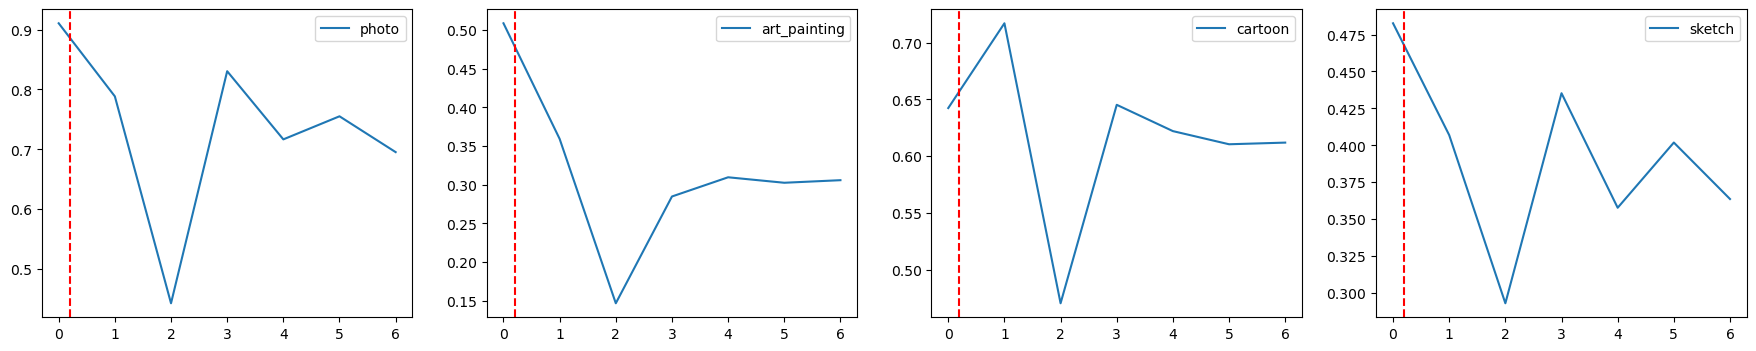

1
photo 1.0
art_painting 0.35530441400304413
cartoon 0.6882575757575757
sketch 0.33047527730652354


In [28]:
max_val_epoch = data["val_max_metric"].item()['epoch']
print(max_val_epoch)

fig, ax = plt.subplots(1,4, figsize=(22, 4))

for idx, domain in enumerate(domain_list):
    ax[idx].plot(domain_test_trends[domain][metric], label = domain)
    print(domain, domain_test_trends[domain][metric])

    if "metric" in data["val_max_metric"].item():
        if "test_epoch" in data["args"].item():
            ax[idx].axvline(x=max_val_epoch / data["args"].item()["test_epoch"], color='r', linestyle='--')
        else:
            ax[idx].axvline(x=max_val_epoch / 5, color='r', linestyle='--')
    else:
        ax[idx].axvline(x=max_val_epoch, color='r', linestyle='--')

    ax[idx].legend()
plt.show()

print(max_val_epoch)
if "metric" in data["val_max_metric"].item():
    for domain in domain_list:
        print(domain, data["val_max_metric"].item()["metric"][domain][metric])
else:
    for domain in domain_list:
        print(domain, domain_test_trends[domain][metric][max_val_epoch])

In [29]:
file_name = selected_records[filter].file_name.iloc[0]
data = np.load(f'{dir_path}/{file_name}', allow_pickle=True)
data

domain_test_trends = dict()
for domain in domain_list:
    domain_test_trends[domain]={
        "test_loss_list":[],
        "AUROC":[],
        "AUPRC":[],
    }

domain_test_trends
for res in data["test_results_list"]:
    if res is not None:
        for key in res:
            domain_test_trends[key]["test_loss_list"].append(np.array(res[key]["test_loss_list"]).mean())
            domain_test_trends[key]["AUROC"].append(res[key]["AUROC"])
            domain_test_trends[key]["AUPRC"].append(res[key]["AUPRC"])

tmp = []
for idx, domain in enumerate(domain_list):
    tmp.append(domain_test_trends[domain][metric])
tmp = pd.DataFrame(tmp, index=domain_list)
idx = tmp.mean(axis = 0).idxmax()
print(idx)
pd.concat([tmp, pd.DataFrame(tmp.mean(axis = 0), columns = ["avg"]).T])

0


,0,1,2,3,4,5,6
photo,0.910714,0.788492,0.442460,0.830556,0.716562,0.755159,0.695238
art_painting,0.508834,0.359215,0.146473,0.284673,0.309530,0.302442,0.305766
cartoon,0.642361,0.717089,0.470289,0.645224,0.622041,0.610450,0.611905
sketch,0.482627,0.406892,0.292997,0.435257,0.357690,0.401860,0.363609
avg,0.636134,0.567922,0.338055,0.548927,0.501456,0.517478,0.494129


### 训练集loss下降趋势

(1,
 array([ 4.43270503,  1.94069437,  1.06297517,  0.64207036,  0.30314641,
         0.15822047, -0.06418298, -0.12156045, -0.18992866, -0.22369486,
        -0.25666951, -0.29750523, -0.29461029, -0.30312846, -0.29493188,
        -0.33723219, -0.31987438, -0.33388218, -0.37105348, -0.31303685,
        -0.33335132, -0.35913808, -0.35565913, -0.36057189, -0.356898  ,
        -0.34983748, -0.36226701, -0.3536203 , -0.31523573, -0.3560797 ]))

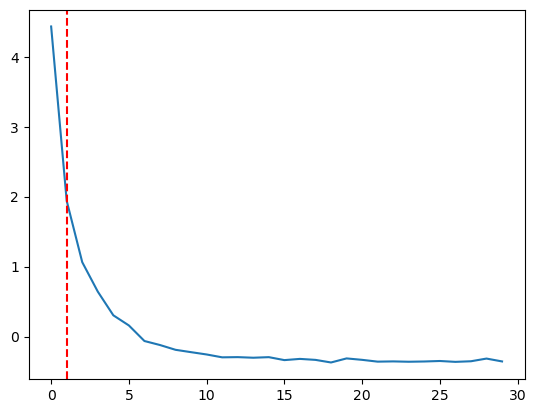

In [30]:
plt.plot(data["train_results_loss"].mean(axis=1))
plt.axvline(x=max_val_epoch, color='r', linestyle='--')
max_val_epoch, data["train_results_loss"].mean(axis=1)

### 训练过程中，模型在val 下降趋势

#### 验证集loss下降趋势

array([0.61950458, 0.50872565, 0.5070708 , 0.48388567, 0.48535166,
       0.50787712, 0.52344929, 0.53049337, 0.51849209, 0.52129201,
       0.52913974, 0.52609297, 0.53073438, 0.52849511, 0.52542867,
       0.53231965, 0.53193019, 0.52250096, 0.52878572, 0.52054452,
       0.5244824 , 0.53274983, 0.5234514 , 0.52375208, 0.52208828,
       0.52454216, 0.52232276, 0.51499459, 0.52333493, 0.52654669])

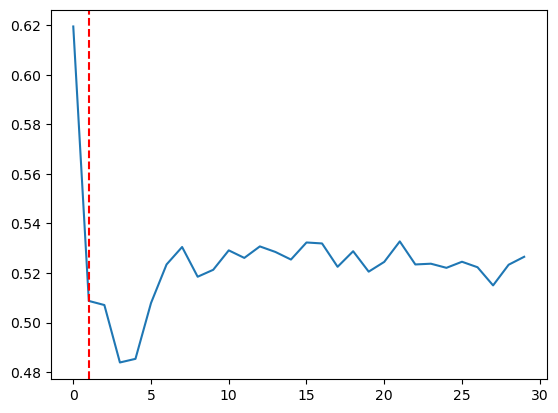

In [31]:
plt.plot(data["val_results_loss"].mean(axis=1))
plt.axvline(x=max_val_epoch, color='r', linestyle='--')
data["val_results_loss"].mean(axis=1)

#### 验证集AUROC

array([0.89305556, 0.90798611, 0.80138889, 0.76631944, 0.77951389,
       0.71423611, 0.73125   , 0.725     , 0.67951389, 0.65243056,
       0.73125   , 0.69513889, 0.70729167, 0.73020833, 0.74340278,
       0.72361111, 0.72951389, 0.72847222, 0.70416667, 0.73680556,
       0.72256944, 0.71805556, 0.7375    , 0.709375  , 0.73611111,
       0.72361111, 0.72395833, 0.71076389, 0.715625  , 0.72430556])

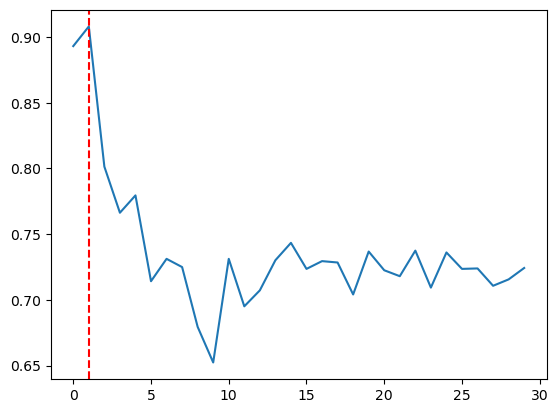

In [32]:
plt.plot(data[f"val_AUROC_list"])
plt.axvline(x=max_val_epoch, color='r', linestyle='--')
# plt.ylim(0.5,1)
data[f"val_AUROC_list"]

array([0.5228045 , 0.53492544, 0.53145929, 0.47382401, 0.48863228,
       0.44044189, 0.36537911, 0.35168171, 0.29046512, 0.21392116,
       0.34947308, 0.32765786, 0.30245315, 0.3271984 , 0.37894433,
       0.35001135, 0.36818967, 0.35874481, 0.28709951, 0.34864484,
       0.3308117 , 0.31078523, 0.364804  , 0.2800772 , 0.33982676,
       0.30406516, 0.32801428, 0.29943304, 0.29228922, 0.32139945])

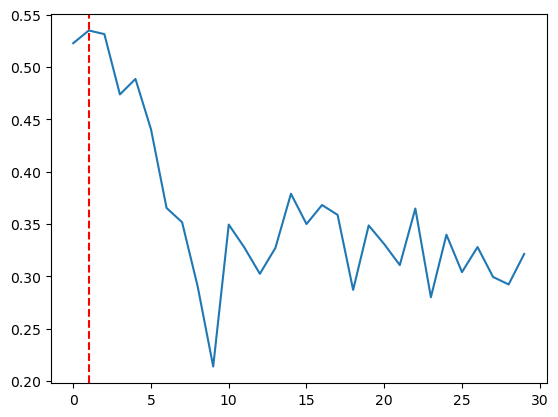

In [33]:
plt.plot(data[f"val_{metric}_list"])
plt.axvline(x=max_val_epoch, color='r', linestyle='--')
# plt.ylim(0.5,1)
data[f"val_{metric}_list"]

[2.46358762 2.24265742 1.89363351 1.52490392 1.18155251 1.03590154
 0.82816101 0.8072269  0.71526536 0.73132223 0.70203169 0.69337894
 0.69873792 0.68691612 0.72866256 0.67384129 0.68398934 0.67918087
 0.6543367  0.68562803 0.67245759 0.651471   0.64766657 0.64586892
 0.65565749 0.6581372  0.65751788 0.65237945 0.68864031 0.65490297]


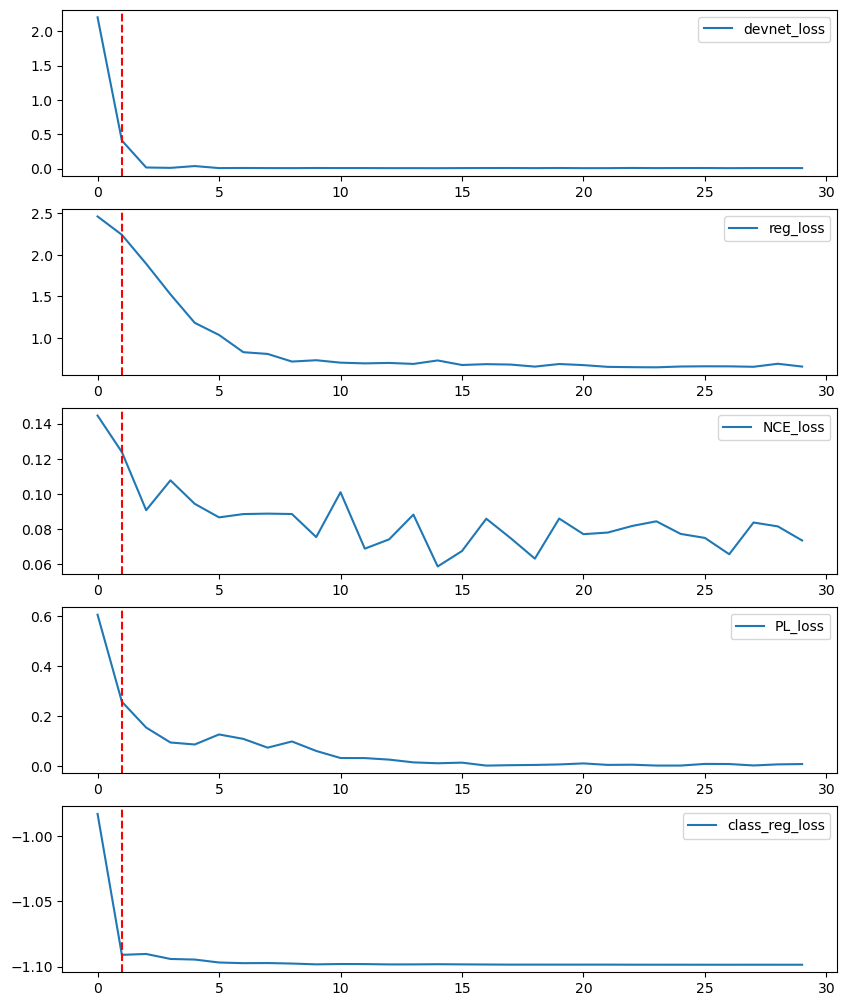

In [34]:
temp = data["sub_train_results_loss"].mean(axis=1)
fig,ax = plt.subplots(temp.shape[1],1,figsize=(10,2.5 * temp.shape[1]))
if dir_path.__contains__("method13"):
    loss_name_list = ["devnet_loss", "reg_loss", "NCE_loss", "PL_loss", "class_reg_loss"]
elif dir_path.__contains__("VAE_LPIPS_DEVNET"):
    loss_name_list = ["rec_loss", "kl_loss", "devnet_loss", "reg_loss", "PL_loss", "class_reg_loss"]
else:
    loss_name_list = ["devnet_loss", "reg_loss", "NCE_loss", "PL_loss", "class_reg_loss"]
for idx, label in enumerate(loss_name_list):
    ax[idx].plot(temp[0:,idx], label=label)
    ax[idx].axvline(x=max_val_epoch, color='r', linestyle='--')
    ax[idx].legend()

# for i in range(5):
#     print(temp[0:,i])
print(temp[0:, 1])
plt.show()

In [35]:
import math
-(1/3)*math.log(1/3)*3
-(0.01)*math.log(0.01) * 2 + (-0.98*math.log(0.98))

0.1119020568909309

In [36]:
# data["sub_train_results_loss"].mean(axis=1)

In [37]:
if "pre_epochs" in para_name_list:
    temp = []
    for item in file_name.split(","):
        if re.match("epochs=|lr=|reg_lambda", item):
            pass
        else:
            temp.append(item)
    data = np.load(f'../experiment/{",".join(temp)}', allow_pickle=True)

In [38]:
plt.plot(data["pre_train_results_loss"].mean(axis=1))

KeyError: 'pre_train_results_loss is not a file in the archive'

In [ ]:
temp = data["sub_pre_train_results_loss"].mean(axis=1)
fig,ax = plt.subplots(2,1,figsize=(6, 6))
ax[0].plot(temp[0:,0], label="NCE_loss")
ax[1].plot(temp[0:,1], label="PL_loss") 
ax[0].legend()
ax[1].legend()
plt.show()

: 

In [ ]:
temp[0:,0]

: 

In [ ]:
temp[0:,1]

: 